In [4]:
import os
os.listdir("../data")


['ev_energy_demand.csv.csv']

In [6]:
import os
os.getcwd()


'c:\\Ev-energy-demand-forecasting\\notebooks'

In [9]:
import pandas as pd

# Correct file name
df = pd.read_csv("../data/ev_energy_demand.csv.csv")
df.head()



,Time,Value
0,2010-01,62623.196
1,2010-02,55850.217
2,2010-03,57069.645
3,2010-04,51282.697
4,2010-05,54092.590


In [10]:
import pandas as pd

# Convert 'Time' to datetime
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m')

# Set as index
df.set_index('Time', inplace=True)

# Check
df.head()


,Value
Time,
2010-01-01,62623.196
2010-02-01,55850.217
2010-03-01,57069.645
2010-04-01,51282.697
2010-05-01,54092.590


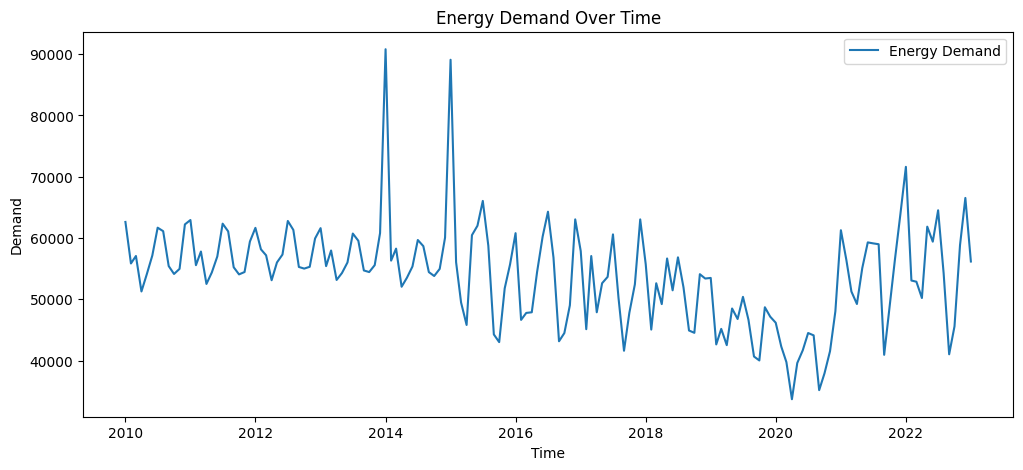

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['Value'], label='Energy Demand')
plt.title('Energy Demand Over Time')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.legend()
plt.show()


In [12]:
# 80% train, 20% test
split = int(len(df) * 0.8)
train = df.iloc[:split]
test = df.iloc[split:]


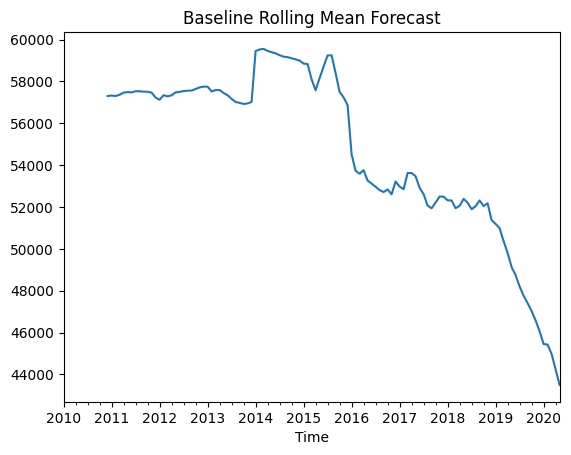

In [13]:
# Rolling mean as baseline
baseline = train['Value'].rolling(window=12).mean()
baseline.plot(title='Baseline Rolling Mean Forecast')
plt.show()


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare features: use previous 3 months to predict next
df['Value_t-1'] = df['Value'].shift(1)
df['Value_t-2'] = df['Value'].shift(2)
df['Value_t-3'] = df['Value'].shift(3)

df = df.dropna()

X = df[['Value_t-1','Value_t-2','Value_t-3']]
y = df['Value']

split = int(len(df)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = RandomForestRegressor()
model.fit(X_train, y_train)

pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE:", rmse)


RMSE: 6696.667135602332


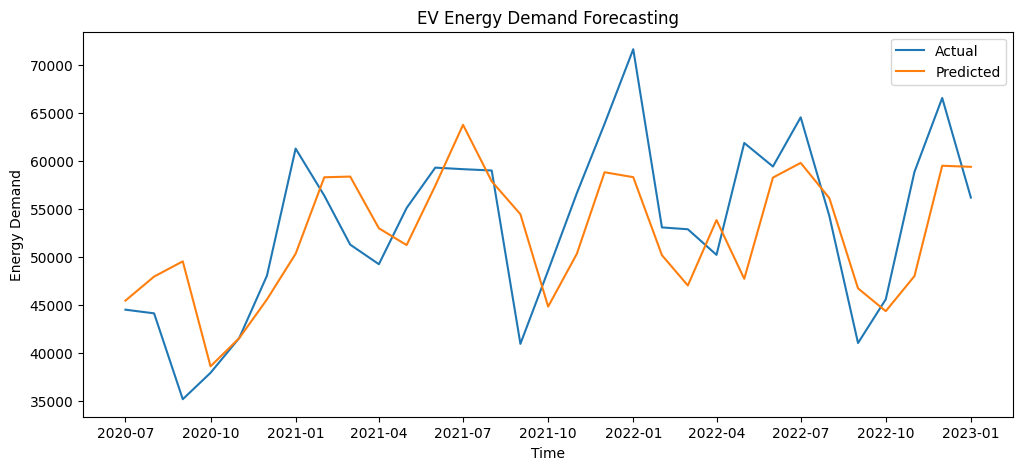

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, pred, label='Predicted')
plt.title('EV Energy Demand Forecasting')
plt.xlabel('Time')
plt.ylabel('Energy Demand')
plt.legend()
plt.show()


In [ ]:
## Model Evaluation

- RMSE (Root Mean Squared Error): <your RMSE value>
- MAE (Mean Absolute Error): <optional, compute if needed>

This shows how well the model predicts energy demand for future months.


In [19]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred)
print("MAE:", mae)


MAE: 5215.176000806462


In [ ]:
## Business Insight

Forecasting energy demand is critical for companies like Ather Energy.
Accurate predictions help:

- Planning EV charging infrastructure  
- Optimizing energy usage and peak load  
- Reducing operational costs

This approach uses previous months’ demand to predict future energy usage, 
providing actionable insights for energy planning.
